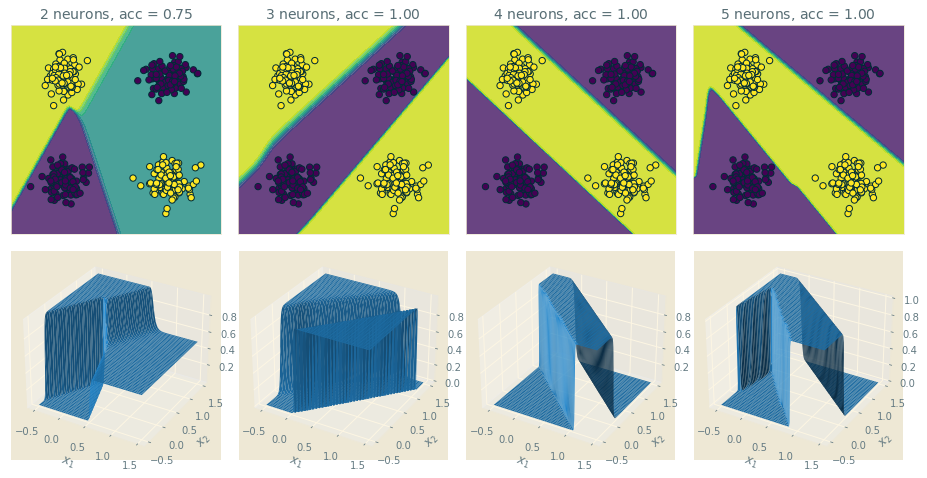

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neural_network import MLPClassifier

X_xor = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
y_xor = np.array([0, 1, 1, 0])  # 异或数据集

X, y, m = X_xor, y_xor, 100
cov = [[0.01, 0], [0, 0.01]]  # 高斯分布的协方差矩阵

# 以异或的4个点为中心 从2维高斯分布中各随机采样100个样本
for (xx, yy) in zip(X_xor, y_xor):
    x1, x2 = np.random.multivariate_normal(xx, cov, m).T
    X = np.r_[X, np.column_stack((x1, x2))]
    y = np.hstack((y, np.ones(m) * yy))

figure = plt.figure(figsize=(16, 8))

with plt.style.context('Solarize_Light2'):

    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    inc = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, inc), np.arange(y_min, y_max, inc))
    i = 0

    h_array = [2, 3, 4, 5]
    col = len(h_array)

    for h in h_array:

        mlp = MLPClassifier(
            hidden_layer_sizes=(h),  # 隐藏层神经元个数
            activation='logistic',   # 激活函数
            max_iter=100,            # 最大迭代轮数
            solver='lbfgs',          # 求解器
            alpha=0,                 # 正则项系数
            random_state=1,
            verbose=False
        )

        clf = mlp.fit(X, y)
        acc = clf.score(X, y)
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
        Z = Z[:, 1].reshape(xx.shape)

        i += 1
        ax = plt.subplot(2, col, i)
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())

        ax.contourf(xx, yy, Z, alpha=.8)

        ax.scatter(X[:, 0], X[:, 1], s=40, c=y, edgecolors='#002b36')
        ax.set_title(r'$%d$ neurons, acc = %.2f' % (h, acc), color='#586e75', size=14)

        ax = plt.subplot(2, col, i+col, projection='3d')

        ax.plot_surface(xx, yy, Z)
        inc = 0.5
        ax.set_xticks(np.arange(x_min, x_max+0.1, inc))
        ax.set_yticks(np.arange(y_min, y_max+0.1, inc))
        ax.set_xlabel(r'$x_1$')
        ax.set_ylabel(r'$x_2$')

plt.subplots_adjust(wspace=0.08, hspace=0.08)
plt.show()